In [64]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [65]:
data=pd.read_csv('moore.csv',header=None).values
X=data[:,0].reshape(-1,1)
Y=data[:,1].reshape(-1,1)


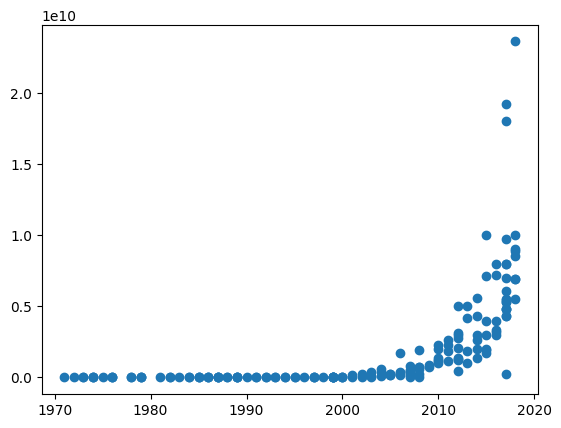

In [66]:
plt.scatter(X,Y)

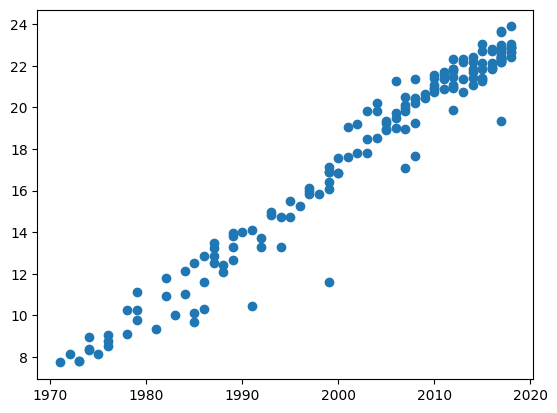

In [67]:
Y=np.log(Y)
plt.scatter(X,Y)

In [77]:
mx=X.mean()
sx=X.std()
my=Y.mean()
sy=Y.std()
X=(X-mx)/sx
Y=(Y-my)/sy

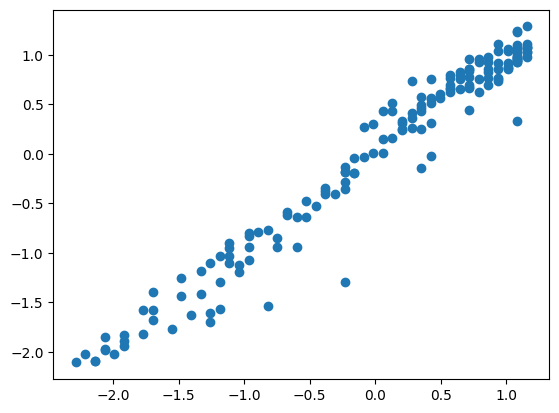

In [78]:
plt.scatter(X,Y);

In [79]:
X=X.astype(np.float32)
Y=Y.astype(np.float32)

In [80]:
model=nn.Linear(1,1)


In [81]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1,momentum=0.7)


In [82]:
inputs=torch.from_numpy(X.astype(np.float32))
targets=torch.from_numpy(Y.astype(np.float32))

In [83]:
n_epochs=100
losses=[]
for it in range(n_epochs):
  optimizer.zero_grad()

  output=model(inputs)
  loss=criterion(output,targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f'Epoch{it+1}/{n_epochs},loss:{loss.item():.4f}')

Epoch1/100,loss:1.2156
Epoch2/100,loss:0.7918
Epoch3/100,loss:0.3328
Epoch4/100,loss:0.0810
Epoch5/100,loss:0.0435
Epoch6/100,loss:0.1010
Epoch7/100,loss:0.1446
Epoch8/100,loss:0.1368
Epoch9/100,loss:0.0972
Epoch10/100,loss:0.0592
Epoch11/100,loss:0.0406
Epoch12/100,loss:0.0395
Epoch13/100,loss:0.0448
Epoch14/100,loss:0.0479
Epoch15/100,loss:0.0466
Epoch16/100,loss:0.0430
Epoch17/100,loss:0.0399
Epoch18/100,loss:0.0386
Epoch19/100,loss:0.0386
Epoch20/100,loss:0.0391
Epoch21/100,loss:0.0393
Epoch22/100,loss:0.0391
Epoch23/100,loss:0.0388
Epoch24/100,loss:0.0386
Epoch25/100,loss:0.0385
Epoch26/100,loss:0.0385
Epoch27/100,loss:0.0385
Epoch28/100,loss:0.0386
Epoch29/100,loss:0.0385
Epoch30/100,loss:0.0385
Epoch31/100,loss:0.0385
Epoch32/100,loss:0.0385
Epoch33/100,loss:0.0385
Epoch34/100,loss:0.0385
Epoch35/100,loss:0.0385
Epoch36/100,loss:0.0385
Epoch37/100,loss:0.0385
Epoch38/100,loss:0.0385
Epoch39/100,loss:0.0385
Epoch40/100,loss:0.0385
Epoch41/100,loss:0.0385
Epoch42/100,loss:0.0385
E

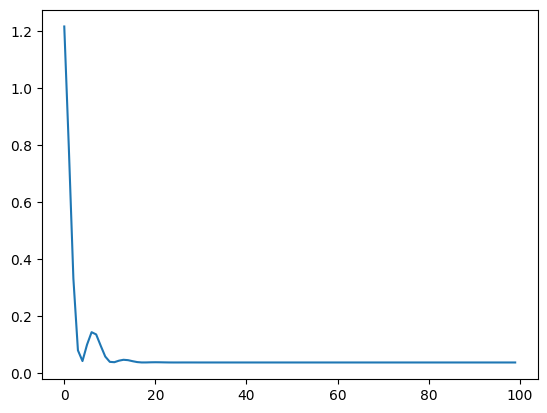

In [84]:
plt.plot(losses)

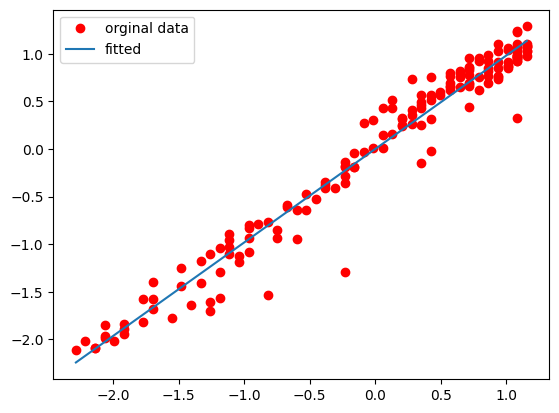

In [85]:
predicted=model(inputs).detach().numpy()
plt.plot(X,Y,'ro',label='orginal data')
plt.plot(X,predicted,label='fitted')
plt.legend()
plt.show()

In [56]:
w=model.weight.data.numpy()
b=model.bias.data.numpy()
print(w,b)

[[0.9805711]] [-1.8250034e-08]


In [59]:
a=w[0][0]*sy/sx
print(a)

0.341682476269441
